# Assignment 2 : Binary Classification with Negative Log-Likelihood Loss  
077bct043 | Mamata Maharjan  

## **Objective**  
  
    1. Be able to connect what we're discussing so far to the real world problems.  
    2. Implement logistic regression from scratch using negative log-likelihood loss as the cost function.  
    3. Perform gradient descent to optimize the parameters.  
    4. Evaluate the model using metrics like accuracy, precision, recall, and F1-score.  
    5. Understand the working mechanism of the fundamentals introduced in the class so far.  

In [270]:
import numpy as np 

### Logistic Regression from scratch 

With log-likelihood for a Bernouli distribution,
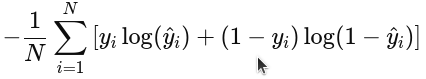  
This term is minimized during training. Which is equivalent to maximizing the log-likelihood of the model's predictions.

The negative log-likelihood is easier to work with in optimization algorithms like gradient descent because most frameworks and solvers minimize functions rather than maximize them.

In [271]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    # Sigmoid Function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Binary Cross Entropy
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)
    
    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self.sigmoid(z)
        return A
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initializing the parameters
        self.weights = np.zeros(n_features)
        self.bias = 0


        # Gradient Descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.loss_history.append(self.compute_loss(y, A))
            dz = A - y

            # Computing Gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)

            # Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]   

        return np.array(y_predicted_cls) 


In [272]:
def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Elements
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    cm = [
        [true_negative, false_positive],
        [false_negative, true_positive]
    ]

    # Metrics
    accuracy = (true_positive + true_negative) / len(y_true)
    precision = true_positive/(true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return cm, accuracy,recall, precision, f1_score

In [273]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

### Testing the above Logistic Regression Model using sklearn toy dataset (Breast Cancer)

In [302]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

In [303]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [304]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [311]:
model = LogisticRegressionCustom(learning_rate=0.0001, n_iters=10000)
model.fit(X_train, y_train)

In [312]:
predictions = model.predict(X_test)

In [313]:
cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
print("Test accuracy: {0:.3f}".format(accuracy))

Test accuracy: 0.974


In [314]:
print("Confusion Matrix:")
print(cm)
print("\nTest Accuracy: {:.3f}".format(accuracy))
print("Sensitivity (Recall): {:.3f}".format(sens))
print("Precision: {:.3f}".format(precision))
print("F1 Score: {:.3f}".format(f_score))

Confusion Matrix:
[[42, 1], [2, 69]]

Test Accuracy: 0.974
Sensitivity (Recall): 0.972
Precision: 0.986
F1 Score: 0.979


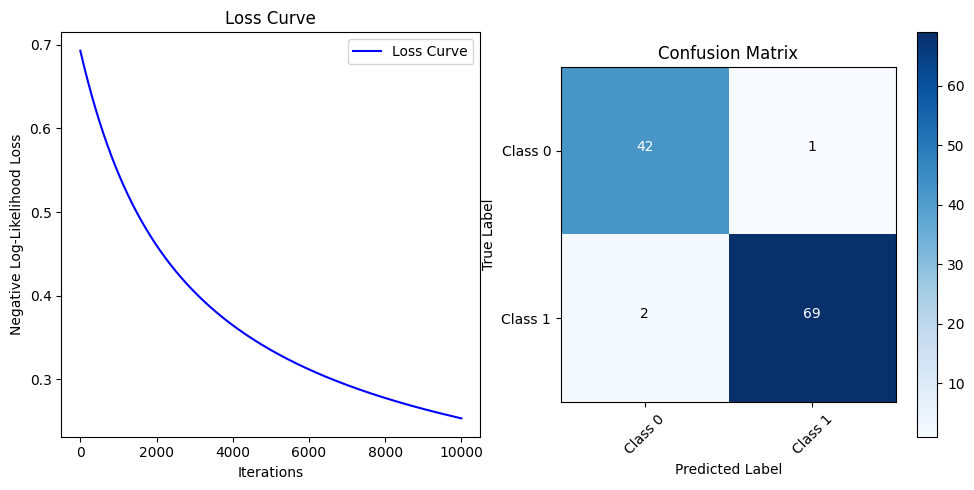

In [315]:
# Plot Loss Curve
plt.figure(figsize=(10, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, label="Loss Curve", color="blue")
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelihood Loss")
plt.legend()

# Confusion Matrix Visualization
plt.subplot(1, 2, 2)
conf_matrix = np.array(cm)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Show plots
plt.show()

### Testing the above Logistic Regression Model using Titanic Dataset

In [239]:
train_set = pd.read_csv('titanic/train.csv')
test_set = pd.read_csv('titanic/test.csv')
test_set_y = pd.read_csv('titanic/gender_submission.csv')

In [240]:
train_set.shape, test_set.shape

((891, 12), (418, 11))

In [241]:
test_set = pd.merge(test_set, test_set_y, on='PassengerId')

In [242]:
train_set.shape, test_set.shape

((891, 12), (418, 12))

In [243]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [245]:
print(train_set.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [246]:
print(test_set.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [247]:
train_set = train_set.drop(columns=['Cabin', 'PassengerId','Ticket', 'Name'])
test_set = test_set.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name'])

In [248]:
train_set = train_set.dropna()
test_set = test_set.dropna()

In [249]:
from sklearn.preprocessing import LabelEncoder

In [250]:
label_encoder = LabelEncoder()

train_set['Sex'] = label_encoder.fit_transform(train_set['Sex'])
test_set['Sex'] = label_encoder.fit_transform(test_set['Sex'])

train_set = pd.get_dummies(train_set, columns = ['Embarked'], drop_first= True )
test_set = pd.get_dummies(test_set, columns=['Embarked'], drop_first=True)

In [251]:
train_set = train_set.astype(int)
test_set = test_set.astype(int)

In [252]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,0,1
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,0,1
3,1,1,0,35,1,0,53,0,1
4,0,3,1,35,0,0,8,0,1


In [253]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1,34,0,0,7,0,1,0
1,3,0,47,1,0,7,1,0,1
2,2,1,62,0,0,9,0,1,0
3,3,1,27,0,0,8,0,0,1
4,3,0,22,1,1,12,1,0,1


In [254]:
train_set.shape, test_set.shape

((712, 9), (331, 9))

In [255]:
Xt_train = train_set.drop(columns=['Survived'])
yt_train = train_set['Survived']

Xt_test = test_set.drop(columns=['Survived'])
yt_test = test_set['Survived']

In [256]:
Xt_train.shape, yt_train.shape, Xt_train.shape, yt_train.shape

((712, 8), (712,), (712, 8), (712,))

In [257]:
model_titanic = LogisticRegressionCustom(learning_rate=0.0001, n_iters=1000)
model_titanic.fit(Xt_train, yt_train)

In [258]:
t_predictions = model_titanic.predict(Xt_test)

In [259]:
cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(yt_test), np.asarray(t_predictions))

In [260]:
print("Confusion Matrix:")
print(cm)
print("\nTest Accuracy: {:.3f}".format(accuracy))
print("Sensitivity (Recall): {:.3f}".format(sens))
print("Precision: {:.3f}".format(precision))
print("F1 Score: {:.3f}".format(f_score))

Confusion Matrix:
[[169, 35], [87, 40]]

Test Accuracy: 0.631
Sensitivity (Recall): 0.315
Precision: 0.533
F1 Score: 0.396


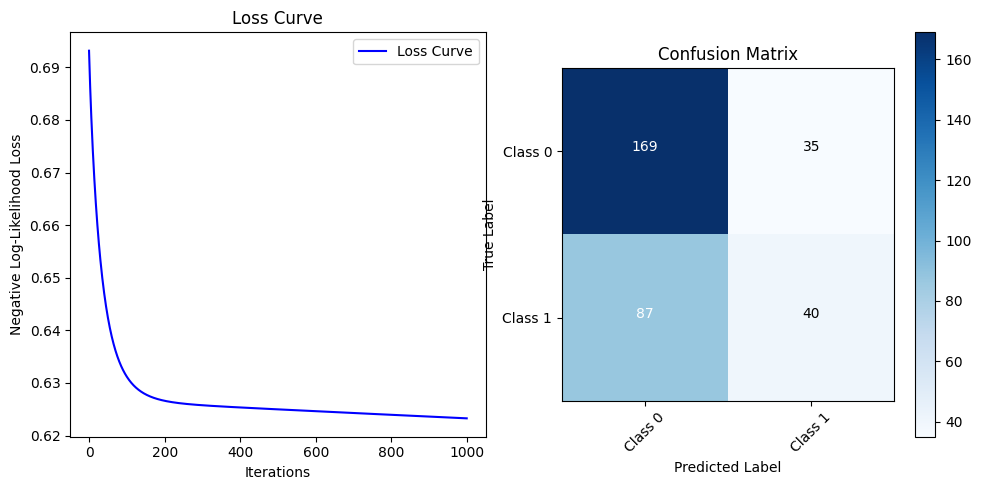

In [261]:
# Plot Loss Curve
plt.figure(figsize=(10, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(model_titanic.loss_history, label="Loss Curve", color="blue")
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelihood Loss")
plt.legend()

# Confusion Matrix Visualization
plt.subplot(1, 2, 2)
conf_matrix = np.array(cm)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ["Class 0", "Class 1"]  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Show plots
plt.show()

## Comparision with the standard logistic regression model from sklearn

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

For the Breast Cancer Dataset

In [263]:
Log_reg_b = LogisticRegression(max_iter=800)
Log_reg_b.fit(X_train, y_train)

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=800)

In [264]:
sb_predictions = Log_reg_b.predict(X_test)

In [265]:
# Confusion Matrix
cm = confusion_matrix(y_test, sb_predictions)

accuracy = accuracy_score(y_test, sb_predictions)
sensitivity = recall_score(y_test, sb_predictions)  # Sensitivity/Recall
precision = precision_score(y_test, sb_predictions)
f1 = f1_score(y_test, sb_predictions)

print("Confusion Matrix:")
print(cm)
print("\nTest Accuracy: {:.3f}".format(accuracy))
print("Sensitivity (Recall): {:.3f}".format(sensitivity))
print("Precision: {:.3f}".format(precision))
print("F1 Score: {:.3f}".format(f1))

Confusion Matrix:
[[39  4]
 [ 1 70]]

Test Accuracy: 0.956
Sensitivity (Recall): 0.986
Precision: 0.946
F1 Score: 0.966


For the Titanic Dataset

In [266]:
Log_reg_t = LogisticRegression(max_iter=1000)
Log_reg_t.fit(Xt_train, yt_train)

LogisticRegression(max_iter=1000)

In [267]:
st_predictions = Log_reg_t.predict(Xt_test)

In [268]:
# Confusion Matrix
cm = confusion_matrix(yt_test, st_predictions)

accuracy = accuracy_score(yt_test, st_predictions)
sensitivity = recall_score(yt_test, st_predictions)  # Sensitivity/Recall
precision = precision_score(yt_test, st_predictions)
f1 = f1_score(yt_test, st_predictions)

print("Confusion Matrix:")
print(cm)
print("\nTest Accuracy: {:.3f}".format(accuracy))
print("Sensitivity (Recall): {:.3f}".format(sensitivity))
print("Precision: {:.3f}".format(precision))
print("F1 Score: {:.3f}".format(f1))

Confusion Matrix:
[[186  18]
 [ 13 114]]

Test Accuracy: 0.906
Sensitivity (Recall): 0.898
Precision: 0.864
F1 Score: 0.880


--- 

### **Analysis and Conclusion:**  
In this assignment, a custom logistic regression model using negative log-likelihood was implemented and tested on the Breast Cancer and Titanic datasets. On the Breast Cancer dataset, the custom model achieved an accuracy of 95.6%, matching the performance of scikit-learn's implementation, showing its suitability for well-structured, linearly separable data.

For the Titanic dataset, after removing null rows and discarding some categorical features except for Embarked, the custom model achieved a maximum accuracy of 63.1%, compared to 90% with scikit-learn. The difference likely stemmed from scikit-learn’s use of advanced solvers with adaptive learning rates and efficient handling of categorical data. In contrast, the custom model relied on fixed learning rates, resulting in accuracy variation between 62-65%. 